In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pycytominer
import easygui as eg
import os 
import sys

sys.path.append(r"C:\Users\Fer\Documents\GitHub")

from umap import UMAP
from scripts_notebooks_fossa.pycombat_umap import combat_util
from combat.pycombat import pycombat

import hdbscan
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.decomposition import PCA

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

c:\Users\Fer\miniconda3\envs\pycytominer\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\Fer\miniconda3\envs\pycytominer\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\Fer\miniconda3\envs\pycytominer\lib\site-packages\umap\distances.py:108

In [2]:
# myfile = eg.fileopenbox(msg="Choose a file", default=r"F:")
myfile = r'F:\2022_09_09_LiveCellPainting_fossa_Cimini\workspace\profiles\2022_06_07_DILI\concatenate\2023_2022_DILI_normalized_to_negcon_feature_selected_pycombat.csv'
print('Filename', myfile)
df = pd.read_csv(myfile)
df.head()

Filename F:\2022_09_09_LiveCellPainting_fossa_Cimini\workspace\profiles\2022_06_07_DILI\concatenate\2023_2022_DILI_normalized_to_negcon_feature_selected_pycombat.csv


,Metadata_Compound_concentration,Metadata_plate_map_name,Metadata_concentration_uM,Metadata_cell_type,Metadata_compound,Metadata_moa,Metadata_DILI-concern,Metadata_Severity Class,Metadata_control_type,Metadata_Plate,...,Nuclei_Texture_InfoMeas1_CorrPI_5_02_256,Nuclei_Texture_InfoMeas2_CorrGFP_10_01_256,Nuclei_Texture_InfoMeas2_CorrGFP_20_01_256,Nuclei_Texture_InfoMeas2_CorrPI_10_01_256,Nuclei_Texture_InfoMeas2_CorrPI_10_03_256,Nuclei_Texture_InfoMeas2_CorrPI_20_01_256,Nuclei_Texture_InfoMeas2_CorrPI_5_02_256,Nuclei_Texture_InverseDifferenceMoment_CorrPI_20_01_256,Nuclei_Texture_SumEntropy_CorrPI_20_01_256,Nuclei_Texture_Variance_CorrGFP_10_00_256
0,Aspirin_1,platemap_dili,1,Huh7,Aspirin,COX inhibitor,Less-DILI-Concern,0,trt,220607_092050_Plate_1,...,-2.951004,8.972212,9.467828,3.344159,4.973588,4.241367,3.079317,-6.922929,5.085131,20.476580
1,Aspirin_10,platemap_dili,10,Huh7,Aspirin,COX inhibitor,Less-DILI-Concern,0,trt,220607_092050_Plate_1,...,-3.494941,10.111767,10.837145,4.132679,6.764881,5.263887,3.938098,-7.676556,7.503385,25.638036
2,Amiodarone_1,platemap_dili,1,Huh7,Amiodarone,sodium/potassium-ATPase inhibitor,Most-DILI-Concern,8,trt,220607_092050_Plate_1,...,-1.841811,7.829725,8.549107,2.769153,4.238343,3.336620,2.770880,-6.197211,5.967763,18.977983
3,Amiodarone_10,platemap_dili,10,Huh7,Amiodarone,sodium/potassium-ATPase inhibitor,Most-DILI-Concern,8,trt,220607_092050_Plate_1,...,-5.101806,8.749530,9.508322,5.012710,7.773764,6.028070,5.164210,-7.555855,9.888656,25.732000
4,Cyclophosphamide_1,platemap_dili,1,Huh7,Cyclophosphamide,DNA alkylation,\tLess-DILI-Concern,5,trt,220607_092050_Plate_1,...,-1.437264,4.918856,5.257418,2.355868,4.110124,3.459964,2.220202,-5.400153,4.833927,9.023156


In [3]:
n_neighbors_input = 15
min_dist_input = 0.5
metric = 'cosine'
hover_list = ['Metadata_Plate','Metadata_Well', 'Metadata_compound', 'Metadata_concentration_uM']
number_of_iterations=50

In [4]:
cols_to_join = ["Metadata_compound", "Metadata_concentration_uM"]
df, new_col = combat_util.col_generator(df, cols_to_join = cols_to_join)

# #just remove the 0 for the non-treated wells
# df[new_col] = df[new_col].str.replace(r' 0', ' 20', regex=True)
# df[new_col].unique()

concentration_uM
Names of the compounds + concentration:  ['Aspirin 1' 'Aspirin 10' 'Amiodarone 1' 'Amiodarone 10'
 'Cyclophosphamide 1' 'Cyclophosphamide 10' 'Etoposide 1' 'Etoposide 10'
 'Non-treated 0' 'Lovastatin 1' 'Lovastatin 10' 'Orphenadrine 1'
 'Orphenadrine 10' 'Lactose 1' 'Lactose 10']


In [5]:
filter_out=['Orphenadrine 1', 'Non-treated 0', 'Lactose 1', 'Lactose 10']

In [6]:
df_filtered = df.query(f'{new_col} not in {filter_out}').reset_index(drop=True)

In [8]:
# feat = pycytominer.cyto_utils.features.infer_cp_features(df, metadata=False)
meta = pycytominer.cyto_utils.features.infer_cp_features(df_filtered, metadata=True)
feat = [x for x in df_filtered.columns.tolist() if x not in meta]
X = pd.DataFrame(df_filtered, columns=feat)
y = pd.DataFrame(df_filtered, columns=meta)

In [10]:
df_3d = combat_util.generate_x_y_umap(df_filtered, n_neighbors=n_neighbors_input, 
                                                  min_dist=min_dist_input, metric=metric, iterate=True, 
                                                  number_runs=number_of_iterations, n_components=3)

## UMAP clustering

In [11]:
# Select the three columns
selected_columns = df_3d[['0', '1', '2']]

# Convert to a NumPy array
result_array = selected_columns.to_numpy()

print(result_array)

[[-8.305229  10.515687  13.44806  ]
 [-8.384703  10.22171   12.903631 ]
 [-9.234428  11.112302  12.273457 ]
 [-6.835235   9.931633  12.8533945]
 [-7.894562  11.056879  13.102196 ]
 [-8.470163  10.826897  13.4449415]
 [-5.7505465 11.225768  14.309713 ]
 [-4.901157  12.082643  13.649579 ]
 [-7.111409  12.384273  12.114345 ]
 [-7.8471904 11.019098  12.0842905]
 [-8.446745   9.945213  11.845133 ]
 [-8.70972    9.972017  10.285003 ]
 [-8.408995   9.292548  10.759972 ]
 [-9.007539  10.8556795 11.220114 ]
 [-4.513246  11.482705  13.8081045]
 [-4.849621  12.22164   14.088934 ]
 [-7.6585717  8.916022  10.312564 ]
 [-7.8552556  8.995055  10.706784 ]
 [-7.9151587 10.106965  11.259665 ]
 [-8.728569   9.492668  10.580925 ]
 [-8.860818   9.473564  11.289731 ]
 [-8.503905   9.002938  12.209925 ]
 [-5.1382637 10.743838  14.192279 ]
 [-4.629078  11.251823  14.341863 ]
 [-5.817309  12.358135   9.740332 ]
 [-5.9898686 11.6299515 10.879697 ]
 [-4.406605  13.622907  11.136353 ]
 [-6.0433617 11.780736   9.5

In [12]:
hdbscan_labels = hdbscan.HDBSCAN(min_samples=6, min_cluster_size=10, metric='euclidean').fit_predict(result_array)

In [13]:
df_3d["Metadata_hdbscan_label"] = hdbscan_labels


combat_util.plot_umap_3d(df_3d, color_col='Metadata_compound', 
                    #   split_df = False, split_column = None, np = None,
                      hover_cols=hover_list,
                      size=True, size_col = "Metadata_concentration_uM",
                      # x="0", y="1",
                      # error_x="x_err", error_y="y_err",
                       dili_color=True
                      )


combat_util.plot_umap_3d(df_3d, color_col='Metadata_hdbscan_label', 
                    #   split_df = False, split_column = None, np = None,
                      hover_cols=hover_list,
                      size=True, size_col = "Metadata_concentration_uM",
                      # x="0", y="1",
                      # error_x="x_err", error_y="y_err",
                       discrete=True
                      )


In [14]:
(
    adjusted_rand_score(y['Metadata_compound'], hdbscan_labels),
    adjusted_mutual_info_score(y['Metadata_compound'], hdbscan_labels)
)

(0.2292076678695685, 0.388277321630227)

In [15]:
clustered = (hdbscan_labels >= 0)
(
    adjusted_rand_score(y['Metadata_compound'][clustered], hdbscan_labels[clustered]),
    adjusted_mutual_info_score(y['Metadata_compound'][clustered], hdbscan_labels[clustered])
)

(0.29469747242559924, 0.5288231278289286)

In [16]:
np.sum(clustered) / X.shape[0]

0.8181818181818182

## more hdsbc parameters

In [38]:
clusterer = hdbscan.HDBSCAN(min_samples=6, min_cluster_size=10, metric='euclidean').fit(result_array)

We can now see the hierarchy as a dendrogram, the width (and color) of each branch representing the number of points in the cluster at that level. If we wish to know which branches were selected by the HDBSCAN* algorithm we can pass select_clusters=True. You can even pass a selection palette to color the selections according to the cluster labeling.

<Axes: ylabel='$\\lambda$ value'>

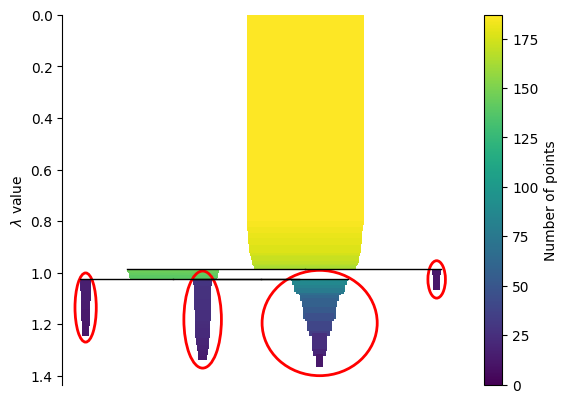

In [39]:
clusterer.condensed_tree_.plot(select_clusters=True)

<Axes: ylabel='distance'>

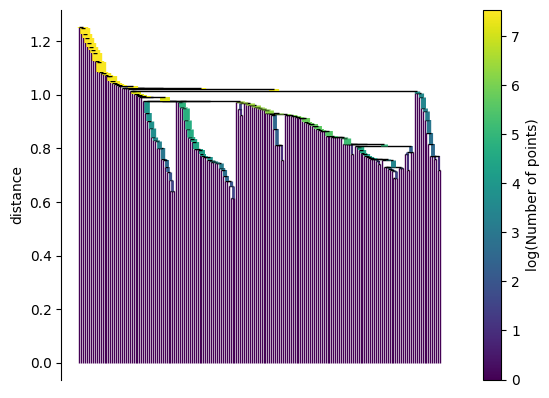

In [40]:
clusterer.single_linkage_tree_.plot()

# kmeans

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42, n_init=20, algorithm="elkan")
kmeans_labels = kmeans.fit_predict(result_array)

In [18]:
df_3d["Metadata_kmeans_label"] = kmeans_labels

combat_util.plot_umap_3d(df_3d, color_col='Metadata_compound', 
                    #   split_df = False, split_column = None, np = None,
                      hover_cols=hover_list,
                      size=True, size_col = "Metadata_concentration_uM",
                      # x="0", y="1",
                      # error_x="x_err", error_y="y_err",
                       dili_color=True
                      )
combat_util.plot_umap_3d(df_3d, color_col='Metadata_kmeans_label', 
                    #   split_df = False, split_column = None, np = None,
                      hover_cols=hover_list,
                      size=True, size_col = "Metadata_concentration_uM",
                      # x="0", y="1",
                      # error_x="x_err", error_y="y_err",
                       discrete=True
                      )

In [54]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Assuming y_true is the true cluster assignments and kmeans_labels is the predicted labels from K-means
ari = adjusted_rand_score(y['Metadata_compound'], kmeans_labels)
nmi = normalized_mutual_info_score(y['Metadata_compound'], kmeans_labels)

print("Adjusted Rand Index:", ari)
print("Normalized Mutual Information:", nmi)

Adjusted Rand Index: 0.24099800304036645
Normalized Mutual Information: 0.3382005423405503
